https://www.kaggle.com/mlg-ulb/creditcardfraud

### Load Data

In [0]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=False)
%cd /content/drive/My Drive/Applied 2020 Şubat/datasets

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Applied 2020 Şubat/datasets


In [0]:
!ls

creditcard.csv	       german_credit_data.csv  RovitDatasetBig_.zip  spam.csv
data_hand_pose.pickle  heart.csv	       RovitDataset.zip      Wine.csv


In [0]:
from matplotlib import pyplot as plt

In [0]:
import pandas as pd
with open('creditcard.csv') as f:
    df = pd.read_csv(f, sep = ',') 

print(df.shape)
df.iloc[:4]


(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0


In [0]:
for col in df:
  print(col)
  

Time
V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
Amount
Class


### Data Examination

In [0]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


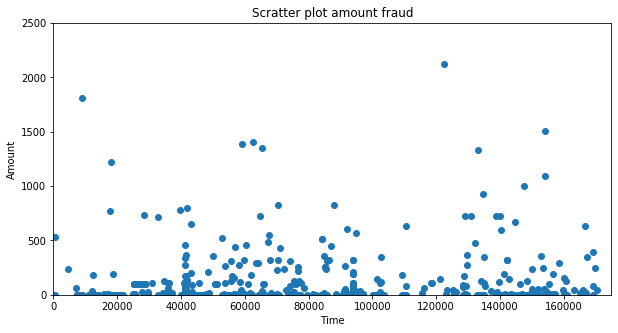

In [0]:
df_fraud = df[df['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(10,5))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

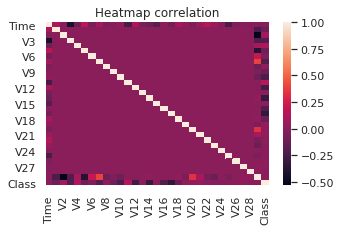

In [0]:
import seaborn
corr = df.corr()
plt.figure(figsize=(5,3))
seaborn.heatmap(corr) # Displaying the Heatmap
seaborn.set(font_scale=1,style='white')

plt.title('Heatmap correlation')
plt.show()

In [0]:
import numpy as np
rank = corr['Class'] 
rank = pd.DataFrame(rank) 
rank = np.abs(rank).sort_values(by='Class',ascending=False)
df_rank.head()

,Class
Class,1.000000
V17,0.326481
V14,0.302544
V12,0.260593
V10,0.216883


In [0]:
rank = rank.drop(['Class'],axis=0)
print(rank.count()[0])
df_rank.dropna(inplace=True)
print(rank.count()[0])


30
30


In [0]:
rank.head()

,Class
V17,0.326481
V14,0.302544
V12,0.260593
V10,0.216883
V16,0.196539


### Preprocess

In [0]:
train_df = df[0:150000] 
positive = train_df[df['Class'] == 1]
poslen = positive.count()[0]
poslen

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


293

In [0]:
negative = train_df[train_df['Class'] == 0]
sample = negative.sample(poslen)
sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
149884,92123.0,-1.339813,1.195713,1.866144,0.259573,0.043771,-0.046002,0.579695,0.231263,1.757598,-1.302814,-1.029920,-3.128013,-0.395511,1.389198,-2.338842,-0.142415,0.565280,-0.268034,-0.462566,-0.449221,-0.688362,-1.720063,-0.202586,-0.303865,0.460967,-1.143915,-0.519695,-0.245447,24.49,0
98501,66685.0,-0.459653,0.595547,2.395506,1.155318,-0.700216,0.232791,-0.185814,0.395789,0.487043,-0.276804,-0.483060,-0.111455,-0.927585,-0.251344,0.695544,-0.606006,0.458477,-0.280511,0.061393,0.072017,-0.004557,0.268054,-0.038136,0.369651,-0.044507,-0.294972,0.337629,0.077736,12.99,0
21232,31548.0,-1.377594,1.240278,1.143970,2.603409,0.721044,-0.024726,-0.557506,-2.401085,-1.168933,0.907576,-0.092269,0.254080,0.411961,0.348635,0.844826,-0.244343,0.285173,-0.608947,-0.420199,-0.870723,2.393256,-0.094389,0.073021,0.411755,-0.825031,0.060969,0.534419,0.142902,22.71,0
83063,59672.0,0.092286,-1.908920,-0.483797,-0.226791,-1.157354,-0.371913,0.313638,0.012129,1.303120,-1.645601,1.923762,1.011512,-0.877639,-0.672114,0.857482,-0.363256,1.038042,0.717060,0.154504,0.957553,0.350452,-0.016406,-0.556959,0.155311,0.321217,-0.682136,-0.009154,0.135746,554.94,0
33001,37050.0,-1.448063,0.602604,1.281090,-0.896574,-1.436780,-0.107480,-0.457997,1.078845,0.304075,-1.312302,0.202185,0.916967,-0.829349,0.239456,-1.770642,0.581088,-0.076478,0.108949,0.043824,-0.414923,0.022374,-0.092474,0.192777,0.381852,-0.632320,0.673797,-0.257773,-0.060434,65.27,0


In [0]:
dataset = positive.append(sample)
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import sklearn

dataset = shuffle(dataset)
print(dataset.head())


            Time         V1         V2  ...       V28  Amount  Class
212644  138942.0  -2.356348   1.746360  ...  0.415703  727.91      1
248971  154181.0  -0.549615   2.219075  ...  0.117188    0.76      1
102446   68207.0 -13.192671  12.785971  ...  0.939407    1.00      1
99506    67150.0  -1.824295   0.403327  ...  0.252713  489.71      1
113203   72979.0  -0.273361   1.199679  ...  0.091800    0.89      0

[5 rows x 31 columns]


In [0]:
x = np.array(dataset.drop(['Time', 'Class'],axis=1))
y = np.array(dataset['Class'])

x = sklearn.preprocessing.normalize(x, norm='l2', axis=1, copy=True, return_norm=False)

print(pd.DataFrame(x).head())


         0         1         2   ...        26        27        28
0 -0.229451  0.193703 -0.159751  ...  0.025914 -0.014218  0.000000
1 -0.005753 -0.005968  0.002057  ... -0.000478  0.000068  0.999914
2 -0.009591  0.007326 -0.001498  ...  0.000165 -0.000637  0.999085
3 -0.069657  0.021514 -0.041066  ... -0.013100  0.013456  0.934463
4  0.083536  0.204384 -0.291346  ... -0.000678  0.009935  0.067683

[5 rows x 29 columns]


In [0]:
df_test = df[150000:]
df_test = shuffle(df_test)
x_test = np.array(df_test.drop(['Time', 'Class'],axis=1))
y_test = np.array(df_test['Class'])
x_test = sklearn.preprocessing.normalize(x_test, norm='l2', axis=1, copy=True, return_norm=False)
pd.DataFrame(x_test).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,0.030197,-0.005118,-0.005454,0.027026,-0.007746,-0.004513,-0.002919,-0.000419,0.019371,-0.000696,-0.020768,0.012579,-0.003292,-0.004158,-0.019270,-0.007930,0.000161,-0.015969,0.002037,-0.003205,-0.008057,-0.020065,0.006601,-0.001576,-0.005847,-0.018343,0.000796,-0.000357,0.997813
1,0.127033,-0.028747,-0.025997,0.018928,-0.039336,-0.017550,-0.039983,0.008344,0.077185,0.002015,0.028872,0.039978,-0.056988,0.021542,0.005088,0.034325,-0.055751,0.033954,0.022041,-0.016359,-0.010140,-0.025549,0.021210,-0.026483,-0.029393,-0.040408,0.001522,-0.002916,0.977620
2,-0.017440,0.010215,0.027722,-0.005272,-0.006486,0.000151,-0.001087,-0.014838,0.012979,-0.010007,-0.016740,0.008696,0.014468,-0.008475,0.013264,0.002140,-0.009651,0.004888,0.001202,-0.007106,0.015955,0.006549,0.001519,-0.001367,-0.012205,-0.007685,0.001553,0.003790,0.998374
3,0.140043,-0.091487,-0.041542,-0.089840,-0.109492,-0.072057,-0.074274,-0.007373,-0.082112,0.113463,0.059445,-0.045879,-0.084332,0.009517,-0.050307,-0.033407,0.035984,0.021728,-0.002899,-0.035013,-0.006174,0.008626,0.019308,0.030945,-0.020587,-0.013277,-0.000268,-0.003734,0.947791
4,0.002133,0.114987,-0.018763,-0.150691,0.172463,-0.026651,0.136218,0.004691,-0.040498,-0.040223,-0.012227,0.094102,0.038242,0.037171,-0.160581,0.054528,-0.159023,-0.003191,0.084169,0.005012,-0.042377,-0.099971,-0.007445,-0.177961,-0.062867,0.030604,0.039260,0.012628,0.887864


###Models

Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train,y_train)
acc = lr.score(x_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))


Test Accuracy 97.46%


K - Nearest Neighbour

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

print("K = {} Accuracy: {:.2f}%".format(2, knn.score(x_test, y_test)*100))

K = 2 Accuracy: 95.16%


Best K Value

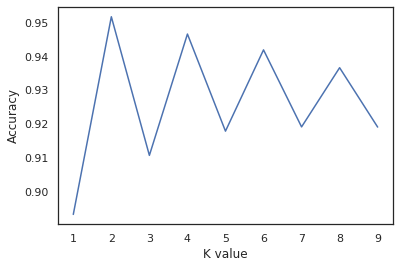

[0.8932399652837019, 0.9516493950610874, 0.9106871304902564, 0.9465383845052556, 0.9178455124733879, 0.9418576186696537, 0.9190991565719882, 0.9365908298530492, 0.9190472304850639]
Maximum KNN Score is 95.16% with K value:2


In [0]:
import numpy as np
accList = []
for i in range(1,10):
    knn2 = KNeighborsClassifier(n_neighbors = i)  
    knn2.fit(x_train, y_train)
    accList.append(knn2.score(x_test, y_test))
    print('Iteration {} done.'.format(i))
    
plt.plot(range(1,10), accList)
plt.xticks(np.arange(1,10,1))
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.show()

print(accList)
acc = max(accList)*100
k = np.argmax(accList)
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}% with K value:{}".format(acc,k+1))

SVM

In [0]:
from sklearn.svm import SVC

svm = SVC(random_state = 1)
svm.fit(x_train, y_train)

acc = svm.score(x_test,y_test)*100
accuracies['SVM'] = acc
print("Test Accuracy: {:.2f}%".format(acc))

Test Accuracy: 98.23%


Naive Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

acc = nb.score(x_test,y_test)*100
accuracies['Naive Bayes'] = acc
print("Test Accuracy: {:.2f}%".format(acc))

Test Accuracy: 97.23%


Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

acc = dtc.score(x_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 88.45%


Random Forest

In [0]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)

acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 98.00%


###Compare

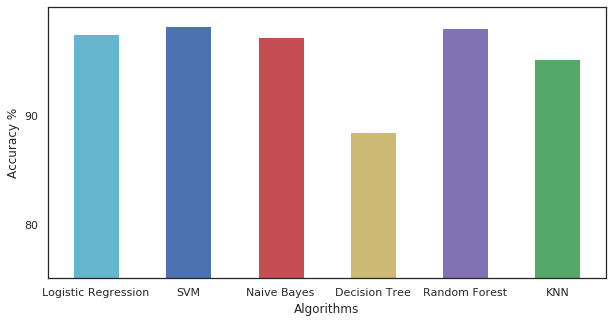

In [0]:
colors = ['c','b','r','y','m','g']

plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.bar(x=accuracies.keys(), height=list(accuracies.values()),width=0.5,color=colors)
plt.ylim([75,100])
plt.show()

In [0]:
y_head_lr = lr.predict(x_test)
knn3 = KNeighborsClassifier(n_neighbors = 1)
knn3.fit(x_train, y_train)
y_head_knn = knn3.predict(x_test)
y_head_svm = svm.predict(x_test)
y_head_nb = nb.predict(x_test)
y_head_dtc = dtc.predict(x_test)
y_head_rf = rf.predict(x_test)

In [0]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)

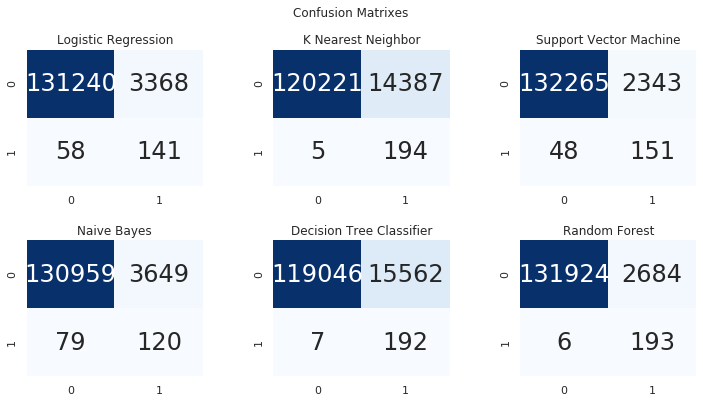

In [0]:
import seaborn as sns
plt.figure(figsize=(12,6))

plt.suptitle("Confusion Matrixes",fontsize=12)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbor")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.show()